<div style="border-radius:10px;
            border : black solid;
            background-color: green;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:black'><center> 🌏🚀📊🧱 50 Startups🧱📊🚀🌏  </center></h2> 

    


<img src ='https://totempool.com/wp-content/uploads/2019/08/Startup_a4171014e8d4cfe295a3db794f5389d6_2000.jpg' width = 1300 >|

<h2 style='; font-weight: bold; font-size:150%; color:red'><center> ✏️✏️Purpose of the Project ✏️✏️</center></h2>  

###  1. Exploratory data analysis (EDA) is one of the most significant methods to examine the data we have. In this project, we are going to explore the hidden patterns in the dataset and extract information from them. 
### 2. Implementing Multiple Linear Regression on the dataset for future predicion.
### 3.  Regularization techniques used to address over-fitting 
### 4. Gradient Descent is an optimization algorithm is used  that minimize a cost function as far as possible.
### 5. In addition to above, Polynomial regression is used to describes the fitting of a nonlinear relationship if any. 

> - In linear regression, the linearity assumption states that there is a linear relationship between the independent variables (also known as predictors or features) and the dependent variable (also known as the target or response variable). This assumption implies that the relationship between the independent variables and the dependent variable can be described by a straight line.

> - Multiple regression suffers from multicollinearity, autocorrelation, heteroskedasticity.
> -  Linear Regression is very sensitive to Outliers. It can terribly affect the regression line and eventually
the forecasted values.


### work flow of the model :

<img src="Wrokflow.jpg" alt="" width="600" height="600">


# ==========================================================
# About Dataset
## About
Dataset about 50 Startups' expenditures & profits

## Column Description
50 startup dataset with columns


- R&D Spend
- Administration
- Marketing Spend
- State
- Profit


# Importing Neccessary Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



# Sklearn package used for Machine Learning
> Model : Linear Regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso, Ridge, ElasticNet,SGDRegressor
from sklearn.metrics import r2_score,mean_absolute_percentage_error, mean_squared_error
from sklearn import metrics

# Loading and Reading Data

In [3]:
dataset = '50_Startups.csv'
df = pd.read_csv(dataset)
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
len(df.columns)

5

In [6]:
df.shape

(50, 5)

# Descriptive Statistics ( Univariate Analysis)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


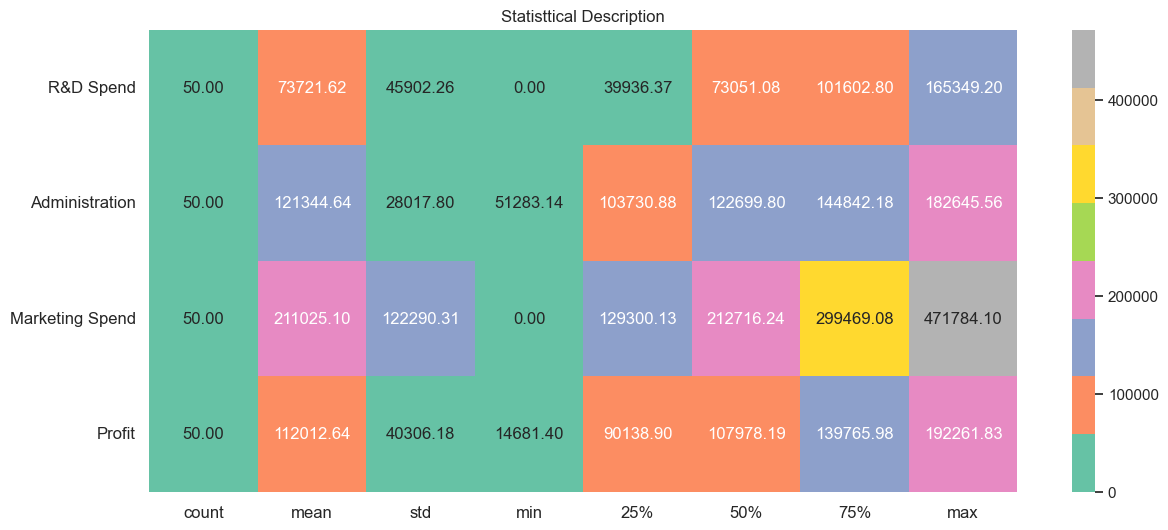

In [8]:

def descriptive_stats(df):
    desc = df.describe().round(2).T
    desc_df = pd.DataFrame(index = df. columns,
                          columns = desc.columns,
                          data = desc)
    
    plt.figure(figsize=(14,6))
    sns.heatmap(desc, annot=True, cmap='Set2', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statisttical Description')
    plt.show()

descriptive_stats(df)

# Removing Duplicate Rows

In [9]:
# Remove duplicates

def drop_dup(df):
    if df.duplicated().any() == True:
        print('The total duplicate row before removing duplicate:', df.duplicated().sum())
        df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
        df = df.reset_index(drop=True) #Reset the index
        print('The total duplicate row after removing duplicate:', df.duplicated().sum(), ' \nshape of dataset after removing duplicate columns :',df.shape)
    else:
        return 'No duplicate entries'
drop_dup(df)

'No duplicate entries'

# Checking Null Value

In [10]:
null_details = {'col_name' : df.columns.tolist(),
                'col_type' : [df[col].dtype for col in df.columns],
                'null_col(%)' :  [df[col].isnull().sum()*100/len(df) for col in df.columns]}

df_null_details = pd.DataFrame(null_details)
df_null_details

,col_name,col_type,null_col(%)
0,R&D Spend,float64,0.0
1,Administration,float64,0.0
2,Marketing Spend,float64,0.0
3,State,object,0.0
4,Profit,float64,0.0


# Exploratory Data Analysis (EDA)📈📊📉

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64


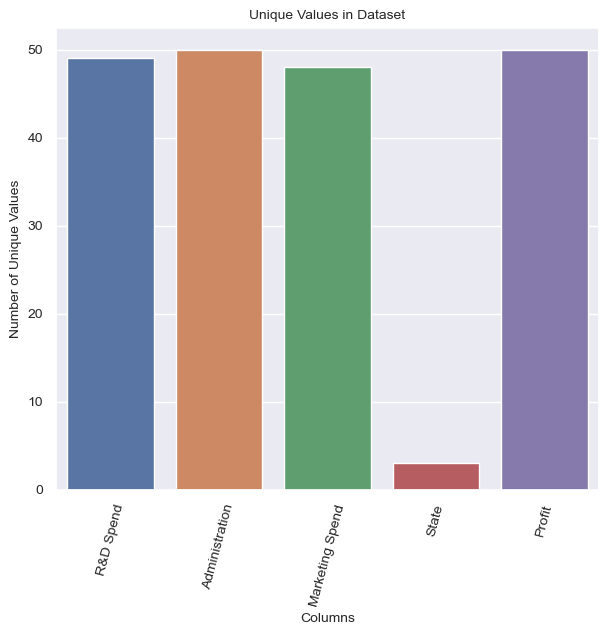

In [11]:
# Count the number of unique values in each column
def check_unquie_count(df):
    unique_counts = df.nunique()
    print(unique_counts)
# Create a bar plot or count plot of unique values
    plt.figure(figsize=(7, 6))
    sns.barplot(x=unique_counts.index, y=unique_counts.values,)

    plt.xticks(rotation=75, fontsize= 10)
    plt.yticks( fontsize= 10 )
    plt.xlabel('Columns',fontsize=10)
    plt.ylabel('Number of Unique Values', fontsize=10)
    plt.title('Unique Values in Dataset', fontsize=10)

# Display the plot
    plt.show()

check_unquie_count(df)

In [12]:
num_not_cat = df.select_dtypes(exclude='object')
num_not_cat.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [13]:
# outlier check on all  independent feature except dependent variable 
outlier_list = list(num_not_cat.columns)

list_remove=['Profit']   
for i in list_remove:
    outlier_list.remove(i)

outlier_list

['R&D Spend', 'Administration', 'Marketing Spend']

# Outlier Check

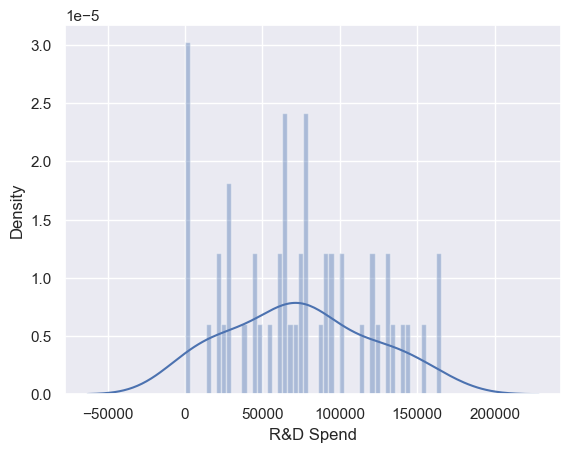

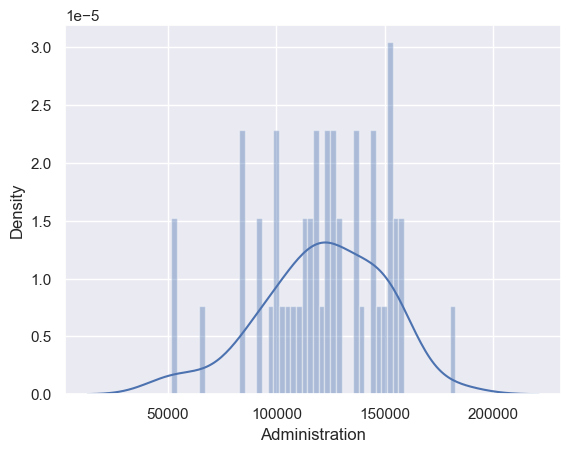

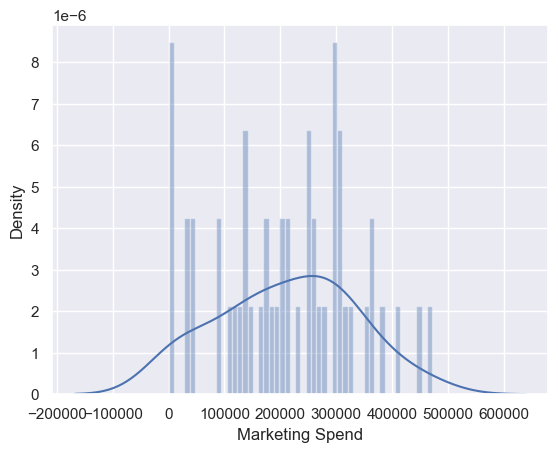

In [14]:
def distplots(df,col):
    sns.distplot(df[col], bins=50,kde=True)
    plt.show()
    
for i in outlier_list:
    distplots(num_not_cat,i)

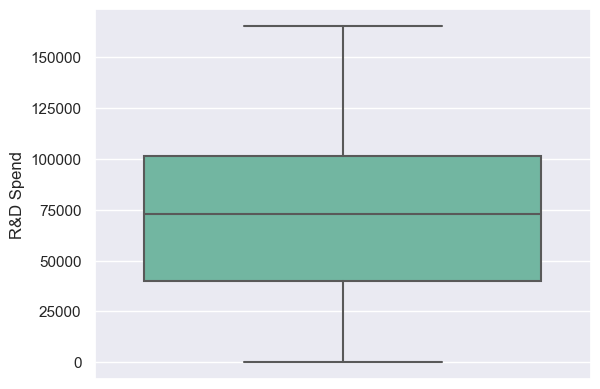

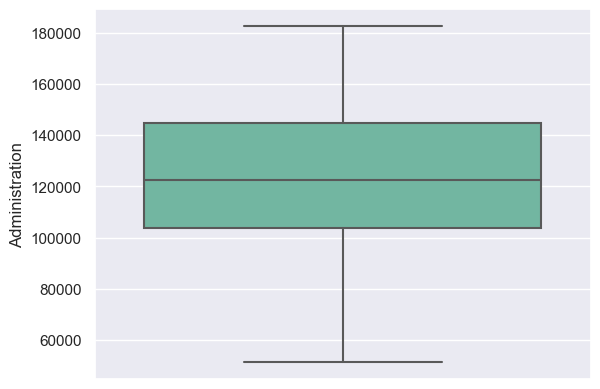

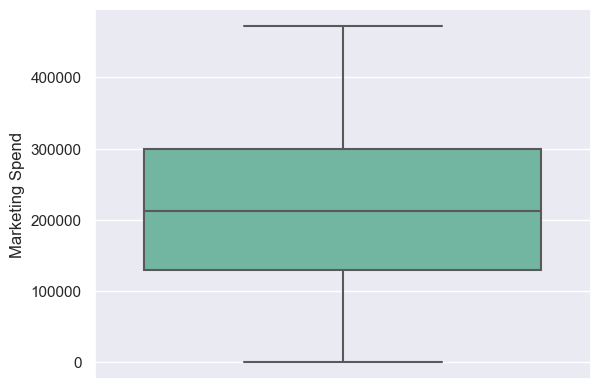

In [15]:
def boxplots(df,col):
    sns.boxplot(y = col, data = df, palette ='Set2' )
    plt.show()

for col in outlier_list:
        boxplots(df,col)

## Bivariate Analysis

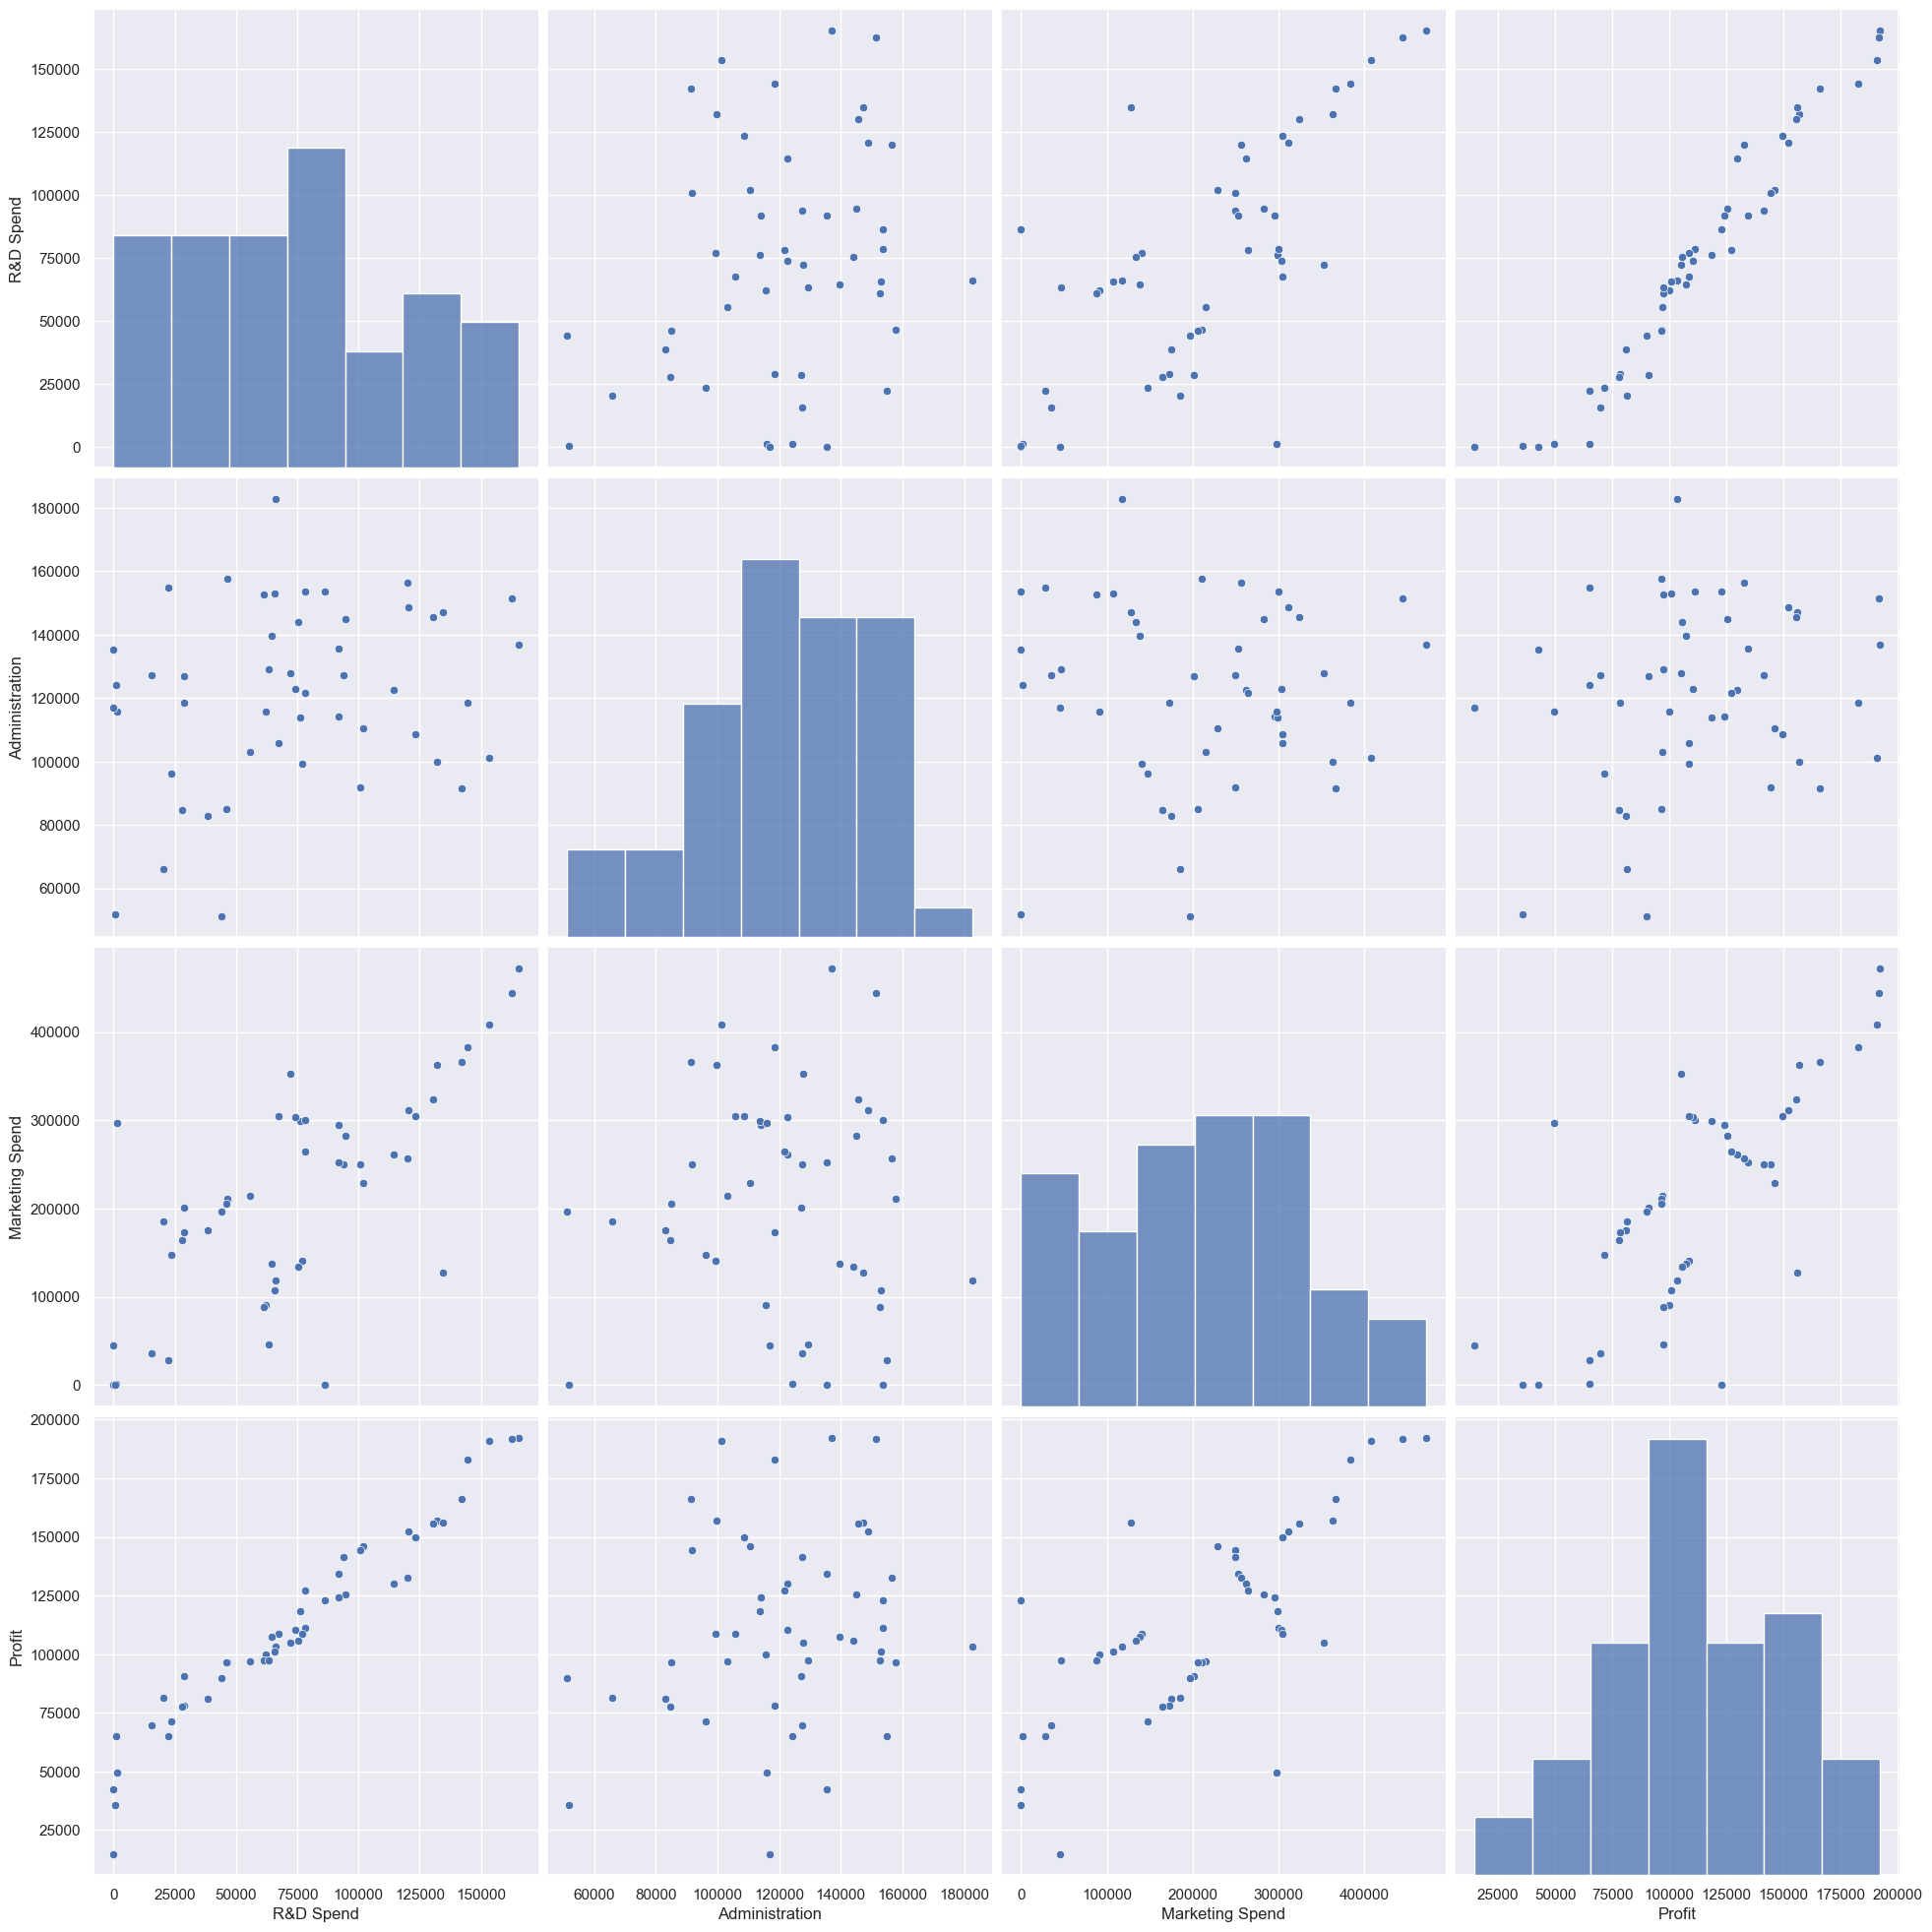

In [16]:
sns.pairplot(df, size = 5, kind = 'scatter') 

<Axes: xlabel='R&D Spend', ylabel='Profit'>

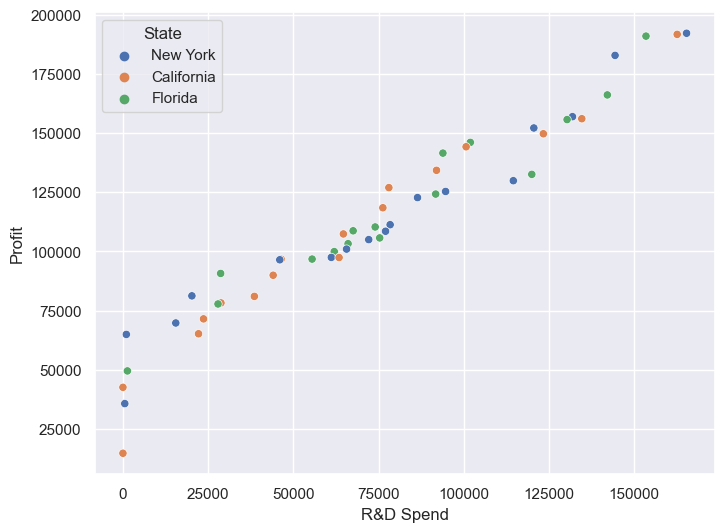

In [17]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['R&D Spend'],y =df['Profit'],hue=df['State'] )

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

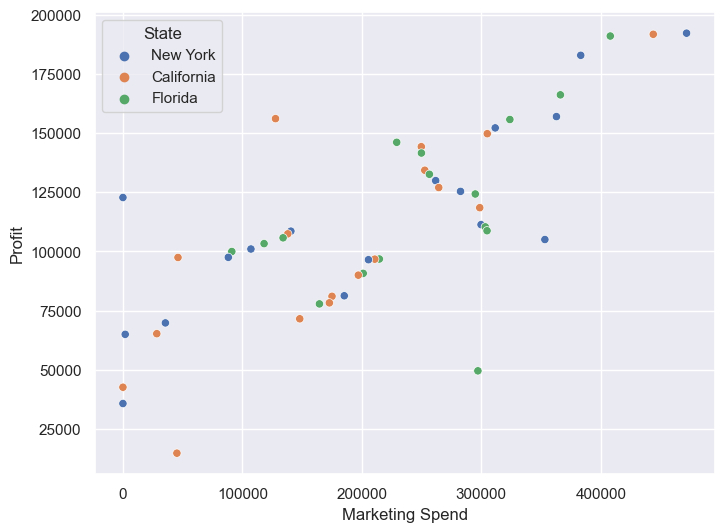

In [18]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['Marketing Spend'],y =df['Profit'],hue=df['State'] )

<Axes: xlabel='Administration', ylabel='Profit'>

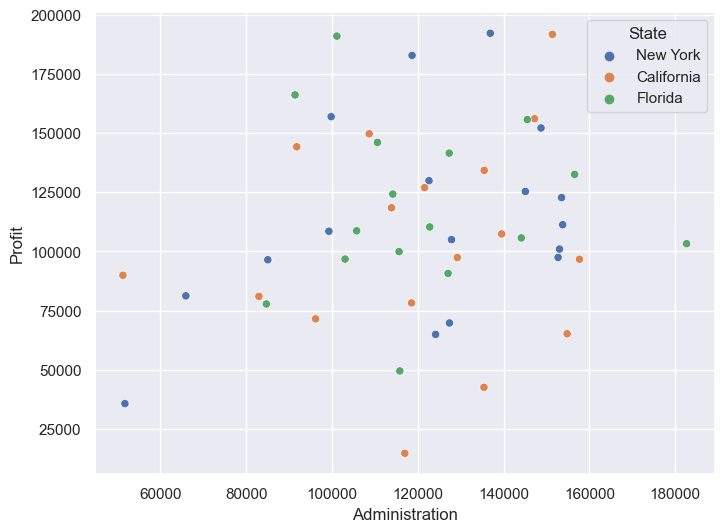

In [19]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['Administration'],y =df['Profit'],hue=df['State'] )

<Axes: xlabel='State', ylabel='count'>

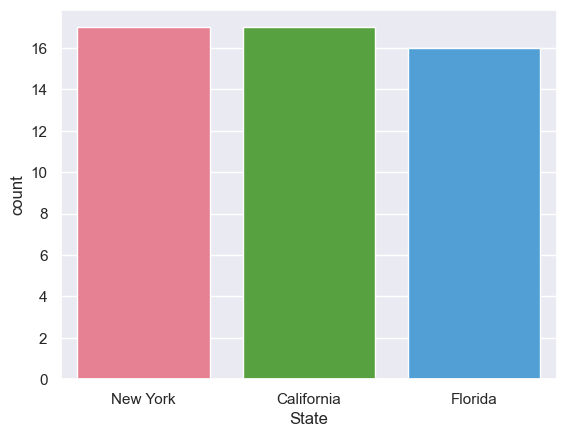

In [20]:
sns.countplot(x = "State", data = df, palette = 'husl', )

# 📈 Preaparation of Data before Training the algorithm


> To train our regression mode, the first step is to split up our data into an target(dependent variables) and features (predictors). And we need to do feature selection only on the predictors or independent variable. 

### Step-1: Spliting into dependent and independent variable


In [21]:
list(df)

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

In [22]:
# Assuming 'y' is the column name of the target variable
target = 'Profit'
y = df[[target]]

# Assuming 'X' is the DataFrame containing the feature columns
features = df.drop(target, axis=1)
x = features

In [23]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [24]:
x.shape

(50, 4)

In [25]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step-2: Encoding of categorical feature

> 'State' feature is object type. In principle, the object type data are treated under encoding after converting the, into category.

In [26]:
for col in x.columns:
    if x[col].dtypes == 'object' and x[col].nunique() > 2:
        x[col].astype('category')
        x = pd.get_dummies(x, columns = [col], drop_first = True)
            
#x = x.drop(['State_New York' ], axis = 1)
x.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1


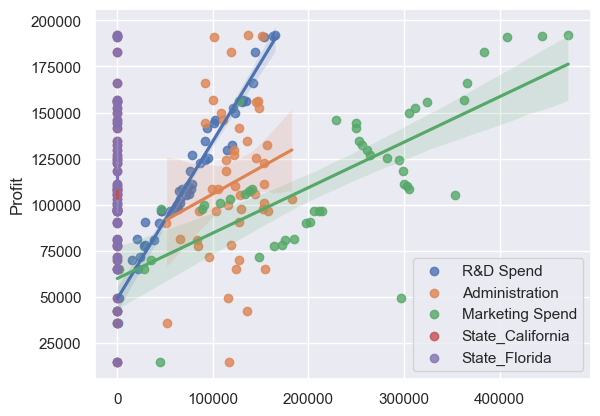

In [27]:
for col in x.columns:
    sns.regplot(x=x[col], y=y, label = col)
    plt.xlabel('')
    plt.legend()

### step -3: Feature Scaling
- Feature scaling is done only on dependent variables. So we need to split the data into target and dependent variable.

In [28]:
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x = pd.DataFrame(sc_x)

In [29]:
sc_x.head()

,0,1,2,3,4
0,2.016411,0.560753,2.153943,-0.717741,-0.685994
1,1.955860,1.082807,1.923600,1.393261,-0.685994
2,1.754364,-0.728257,1.626528,-0.717741,1.457738
3,1.554784,-0.096365,1.422210,-0.717741,-0.685994
4,1.504937,-1.079919,1.281528,-0.717741,1.457738


In [30]:
list(x)

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'State_California',
 'State_Florida']

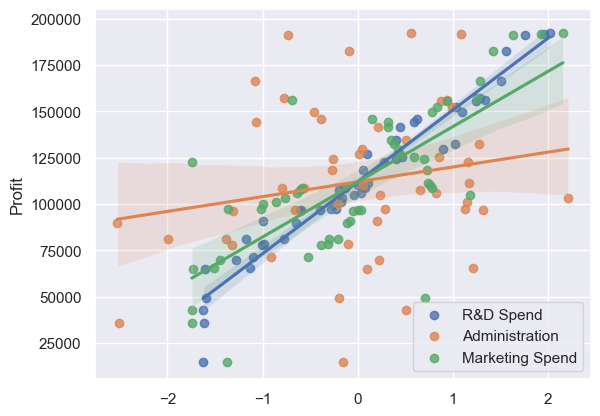

In [31]:
sns.regplot(x=sc_x[0], y=y, label='R&D Spend',)
sns.regplot(x=sc_x[1], y=y, label='Administration',)  
sns.regplot(x=sc_x[2], y=y, label='Marketing Spend',) 
plt.xlabel('')
plt.legend()
plt.show()

### step -4: Multi-collinearity check
> There should be no or little mulyicollinearity present for the model building

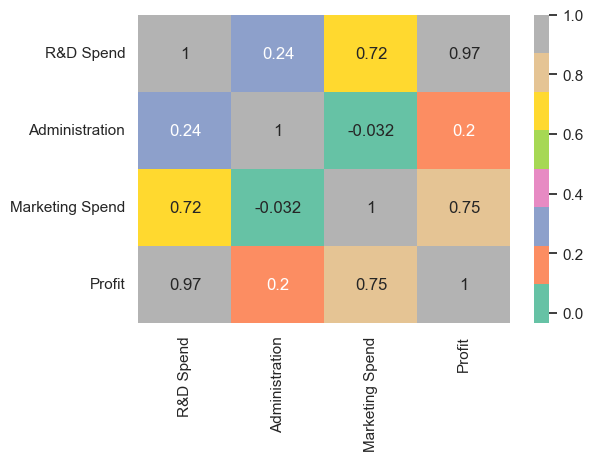

In [32]:
# Finding correlation
plt.figure(figsize=(6,4))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()

### VIF (Multi-collinearity Check)

Multicollinearity refers to a situation in regression analysis where there is a high correlation between two or more predictor variables (also known as independent variables or features). It occurs when the predictor variables in a regression model are highly linearly related to each other, making it difficult to distinguish the individual effects of each variable on the dependent variable.

In the presence of multicollinearity, it becomes challenging to determine the true relationship between the predictor variables and the target variable. This is because multicollinearity can lead to unstable and unreliable estimates of the regression coefficients.


Identifying multicollinearity: Common methods to detect multicollinearity include calculating correlation matrices, variance inflation factors (VIF> 5).

Dealing with multicollinearity: If multicollinearity is detected , several strategies can be employed, 

- Dropping one or more correlated variables from the model.
(incase more than 1 features have VIF > 5, drop highest and need to perform VIF check again.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = sc_x
data = {'VIF' : [variance_inflation_factor(variable, i ) for i in range(len(sc_x.columns))],
        'Features' : x.columns}
     
vif = pd.DataFrame(data)

In [34]:
vif

,VIF,Features
0,2.495511,R&D Spend
1,1.177766,Administration
2,2.416797,Marketing Spend
3,1.335061,State_California
4,1.361299,State_Florida


- for VIF > 5 refers to multicollinearity. For linear regression model building we need no or little  multicollinearitywe need to drop the feature. As we don't need multi-collinearity


## step-5: Split the data for building the model and  prediction


## **CASE- I : Test size = 0.3 **
Split the data (70% Train and 30% Test)

In [35]:
# Split the data into training and test for building the model and for prediction
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=121)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(35, 5) (15, 5) (35, 1) (15, 1)


## Approach no - 1 : Multiple LINEAR REGRESSION 📈📉



# Multiple linear equation ;
### $\hat{y}= y + \varepsilon$
### $\hat{y}= \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \ldots + \beta_n \cdot x_n + \varepsilon$
### $\hat{y} = \beta_0 +\Sigma_1^i\beta_i \cdot x_i + \varepsilon$
> where $\beta_0$ is intercept and $\beta_i$'s are slopes and $\varepsilon$ is error.

- $Response = (Constant + Slope * Predictors) + Error $
- y is the Response, $x_i$'s are the Predictors
- The difference between the actual value and the model's estimate a residual (error).
- These residuals will play a significant role in judging the usefulness of a model.
- If the residuals are small, it implies that the model is a good estimator.

<img src="hyperplane.jpg" alt="" width="400" height="300">

##  Performance Matrix


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

## $R^2$ Score




# \begin{equation*} 
R^2 = 1 - \frac{SSR}{TSS} = 1 - \frac{\sum_i (y_i -\hat{y}_i)^2}{\sum_i (y_i-\bar{y})^2}
\end{equation*}

- > TSS : Total Sum of Square = $\Sigma_i (Actual)_i -(Mean Actual)$ = $\sum_i (y_i -\bar{y})^2$
- > SSR : Sum of Square residual 
> =$(Residual)^2$
> =$(Actual -Predicted)^2$
> =$\sum_i (y_i -\hat{y}_i)^2$

## Adjusted $R^2$

# $R^2_{adj} = 1- \frac{(1-R^2)(N-1)}{(N-p-1)}$

> - N  = Total sample size 
> - p = Number of predictors ( No. of Independent variable)

### # Training

In [36]:
# Tain the model with LR model
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [37]:
# find the slopes and intercept from the trained model
intercept =LR.intercept_
slope =LR.coef_

print('The intercept for our linear model is :',intercept.round(3))
print()
print('The coefficients are :',slope.round(3))

The intercept for our linear model is : [43887.251]

The coefficients are : [[ 8.480000e-01 -1.900000e-02  1.800000e-02  7.453231e+03  3.063963e+03]]


In [38]:
slope = slope.reshape(5,1)
print(slope.shape, x.columns.shape)

(5, 1) (5,)


In [39]:
Lr_data = {'Slope': slope,'Features' : x.columns}
coeff_df = pd.DataFrame(slope, columns=['Slope'], index =x.columns)
coeff_df

,Slope
R&D Spend,0.848180
Administration,-0.019409
Marketing Spend,0.018301
State_California,7453.231161
State_Florida,3063.963122


### # Prediction of target variable using Linear Regression model

In [40]:
# Predict house price by using linear Regression model with test dataset
y_pred_train = LR.predict(x_train)
err_train = y_train - y_pred_train
Train_accuracy = r2_score(y_train, y_pred_train)

y_pred_test = LR.predict(x_test)
err_test = y_test - y_pred_test
Test_accuracy = r2_score(y_test, y_pred_test)
print ('Train accuracy :', Train_accuracy,'\n' 'Test accracy   :', Test_accuracy)

Train accuracy : 0.9659473642911475 
Test accracy   : 0.8990798108840938


In [41]:
err_train.skew()

Profit   -0.306667
dtype: float64

In [42]:
err_train.kurtosis()

Profit    0.42166
dtype: float64

According to the histogram the error terms are normally distributed and that is then further confirmed by skewness and kurtosis which are close to zero.

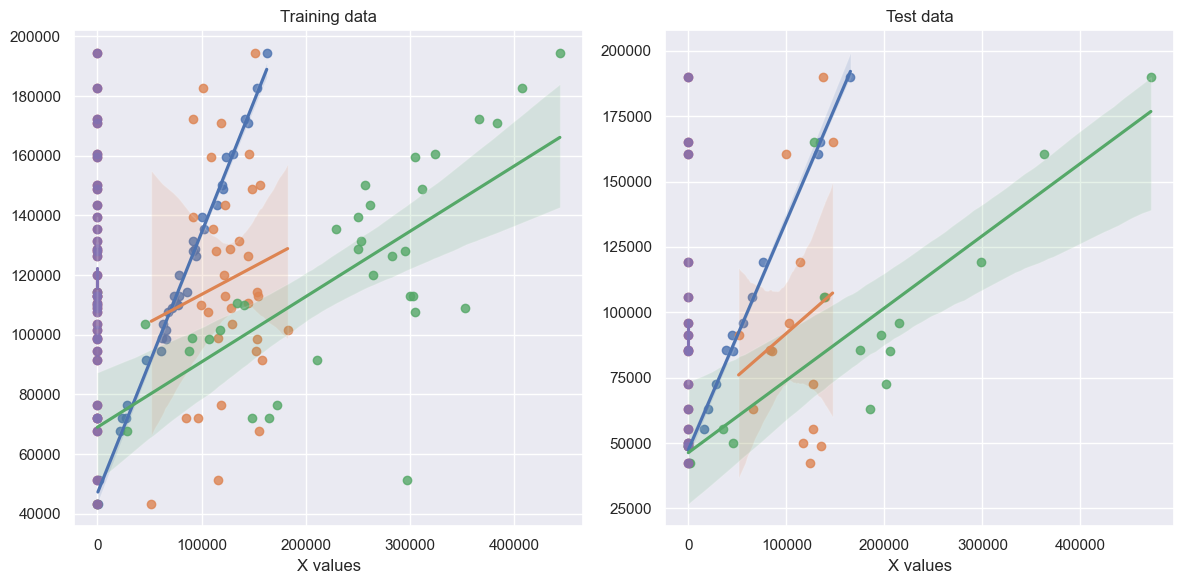

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot regression for training data
for i in range(len(x_train.columns)):
    sns.regplot(x=x_train.iloc[:,i ], y=y_pred_train, ax=ax1, )
    ax1.set_title('Training data')
    ax1.set_xlabel('X values')


# Plot regression for test data
for i in range(len(x_test.columns)):
    sns.regplot(x=x_test.iloc[:, i], y=y_pred_test, ax=ax2)
    ax2.set_title('Test data')
    ax2.set_xlabel('X values')

# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

In [44]:
# mse, rmse, mape
MSE = mean_squared_error(y_test,y_pred_test)
print(f'1. mean squared error (MSE) = ',MSE)
RMSE = np.sqrt(MSE)
print(f'2. root mean squared error (RMSE) = {RMSE}')
MAPE = mean_absolute_percentage_error(y_test,y_pred_test)
print(f'3. mean absolute percentage error (MAPE) = {MAPE}')
ACC = 100-MAPE*100
print(f'4. accuracy of the model = {ACC}')

1. mean squared error (MSE) =  194052164.52818343
2. root mean squared error (RMSE) = 13930.260748750665
3. mean absolute percentage error (MAPE) = 0.25548939871234455
4. accuracy of the model = 74.45106012876555


## Approach no 2 : Ordinary Least Square (OLS) Method

In [46]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [47]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()   # with unscaled data
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              854.0
Date:                Mon, 17 Jul 2023   Prob (F-statistic):                    2.20e-31
Time:                        22:16:10   Log-Likelihood:                         -373.19
No. Observations:                  35   AIC:                                      756.4
Df Residuals:                      30   BIC:                                      764.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8442      0.065     12.900      0.000       0.711       0.978
Administration       0.2484      0.037      6.718      0.000       0.173       0.324
Marketing Spend      0.0429      0.022      1.932      0.063      -0.002       0.088
State_California  1.253e+04   4782.658      2.620      0.014    2761.040    2.23e+04
State_Florida     8205.2066   4459.135      1.840      0.076    -901.563    1.73e+04
==============================================================================
Omnibus:                        0.833   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.362
Skew:                          -0.245   Prob(JB):                        0.834
Kurtosis:                       3.093   Cond. No.                     8.71e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
reg_model = smf.OLS(endog = y_test, exog=x_test).fit()   # with unscaled data
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              115.8
Date:                Mon, 17 Jul 2023   Prob (F-statistic):                    1.62e-08
Time:                        22:16:10   Log-Likelihood:                         -164.38
No. Observations:                  15   AIC:                                      338.8
Df Residuals:                      10   BIC:                                      342.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.5366      0.155      3.464      0.006       0.191       0.882
Administration       0.4017      0.081      4.948      0.001       0.221       0.583
Marketing Spend      0.1404      0.054      2.602      0.026       0.020       0.261
State_California -5149.8625   9453.054     -0.545      0.598   -2.62e+04    1.59e+04
State_Florida    -4237.5460   1.47e+04     -0.288      0.779    -3.7e+04    2.86e+04
==============================================================================
Omnibus:                        4.375   Durbin-Watson:                   2.350
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                2.026
Skew:                          -0.840   Prob(JB):                        0.363
Kurtosis:                       3.645   Cond. No.                     8.55e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Endoginity Problem : if dependent variable is set wrongly that is endoginity problem

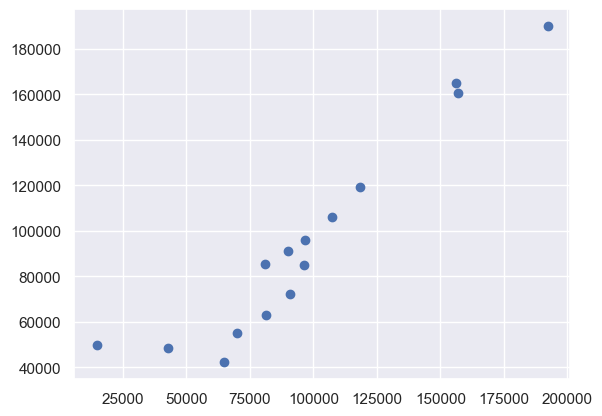

In [49]:
# Check linearity

plt.scatter(y_test, y_pred_test)

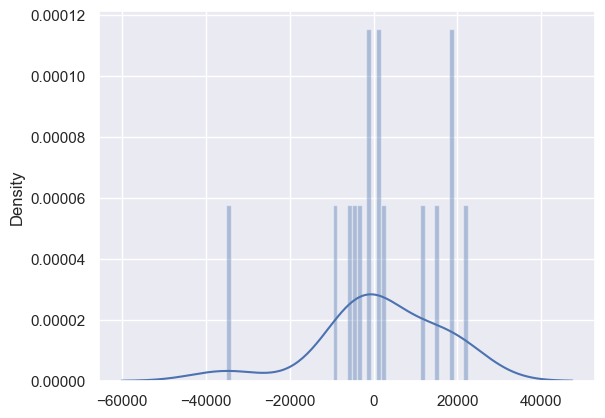

In [50]:
# Normality of Residual

sns.distplot((y_test - y_pred_test), bins=50)
plt.show()

### Assumption of LR Model is satisfied

#### 1) Linearity - Satisfied
#### 2) Normality of Residuals- Satisfied
#### 3) Homoscedasticity - Satisfied (there is no outlier and residual is normaly distributed)
#### 4) No autocorrelation - Satisfied
#### 5) No or little Multicollinearity - satisfied
#### 6) No endogenity problem - satisfied 

 ## In order to create less complex model when you have a large number of features in your dataset, some of the Regularization techniques used to address over-fitting and feature selection are:

# Lasso (L1 reguralization):

> Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

## $$\text{arg min}_{\beta_o, \beta_j}\sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p} |\beta_j|$$

> The lasso estimate thus solves the minimization of the least-squares penalty. $\lambda$ controls the strength of reguralization
***

In [51]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print("Lasso Model :", (lasso.coef_))
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)
print("Training Accuracy :", r2_score(y_train, y_pred_train_lasso))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_lasso))

Lasso Model : [ 8.48177890e-01 -1.94094101e-02  1.83023655e-02  7.45221340e+03
  3.06302820e+03]
Training Accuracy : 0.9659473641429505

Test Accuracy : 0.8990841735485041


# Ridge :

> Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

 ## $$\text{arg min}_{\beta_o, \beta_j} \sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p} \beta_j^2$$

> $\lambda>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\lambda$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

> Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.
***

In [52]:
# Part 2 : Ridge Regression (L2- Regularization)
# closure to zero but not exact zero
# penalty - 0.3

ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge Model :", (ridge.coef_))
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)
print("Training Accuracy :", r2_score(y_train, y_pred_train_ridge))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_ridge))

Ridge Model : [[ 8.47223070e-01 -1.96370335e-02  1.86669800e-02  6.96695621e+03
   2.72415779e+03]]
Training Accuracy : 0.9659193037668692

Test Accuracy : 0.9011734894553887


# ElasticNet

The first term represents the residual sum of squares, the second term is the L1 regularization term (Lasso), and the third term is the L2 regularization term (Ridge). The Elastic Net regularization combines both L1 and L2 regularization, allowing for a balance between feature selection and coefficient shrinkage. The parameters $\lambda_1$ and  $\lambda_2$  control the strengths of the respective regularization terms.

## $$\text{arg min}_{\beta_o, \beta_j}\sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2$$

In [53]:
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(x_train, y_train)
y_pred_train_elastic = elastic.predict(x_train)
y_pred_test_elastic = elastic.predict(x_test)
print("Training Accuracy :", r2_score(y_train, y_pred_train_elastic))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_elastic))

Training Accuracy : 0.9632279233912138

Test Accuracy : 0.9179513210700663


# Gradient Descent
> Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.


In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.25, random_state=101)
print('x_train shape :',x_train.shape,'\n''x_test shape :', x_test.shape,'\n' 'y_train shape :',y_train.shape,'\n''y_test shape :', y_test.shape)
print()
gd = SGDRegressor()
gd.fit(x_train, y_train)
y_pred_gd_train = gd.predict(x_train)
y_pred_gd_test = gd.predict(x_test)
Train_accuracy_gd =r2_score(y_train, y_pred_gd_train)
Test_accuracy_gd = r2_score(y_test, y_pred_gd_test)

print("GD Trainging Accuracy :", Train_accuracy_gd  )
print("GD Test Accuracy      :",Test_accuracy_gd  )

x_train shape : (37, 5) 
x_test shape : (13, 5) 
y_train shape : (37, 1) 
y_test shape : (13, 1)

GD Trainging Accuracy : 0.9472665189054107
GD Test Accuracy      : 0.9409293485798228


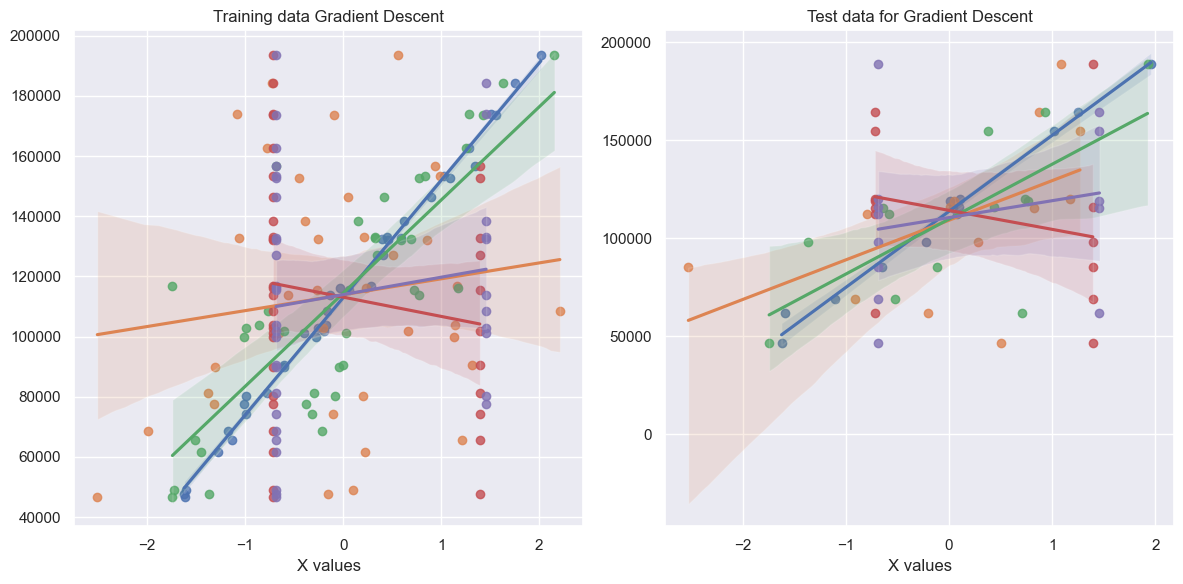

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot regression for training data
for i in range(len(x_train.columns)):
    sns.regplot(x=x_train.iloc[:,i ], y=y_pred_gd_train, ax=ax1, )
    ax1.set_title('Training data Gradient Descent')
    ax1.set_xlabel('X values')


# Plot regression for test data
for i in range(len(x_test.columns)):
    sns.regplot(x=x_test.iloc[:, i], y=y_pred_gd_test, ax=ax2)
    ax2.set_title('Test data for Gradient Descent')
    ax2.set_xlabel('X values')

# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

# Polynomial regression

In [56]:
poly = PolynomialFeatures()
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
poly.fit(x_train, y_train)
y_pred_poly_train = lr.predict(x_train_trans)
y_pred_poly_test = lr.predict(x_test_trans)
Train_accuracy_poly =r2_score(y_train, y_pred_poly_train)
Test_accuracy_poly = r2_score(y_test, y_pred_poly_test)

print("Polynomial Regression Trainging Accuracy :", Train_accuracy_poly  )
print("Polynomial Regression Test Accuracy      :",Test_accuracy_poly )

Polynomial Regression Trainging Accuracy : 0.9643335626660127
Polynomial Regression Test Accuracy      : 0.8670425426922718


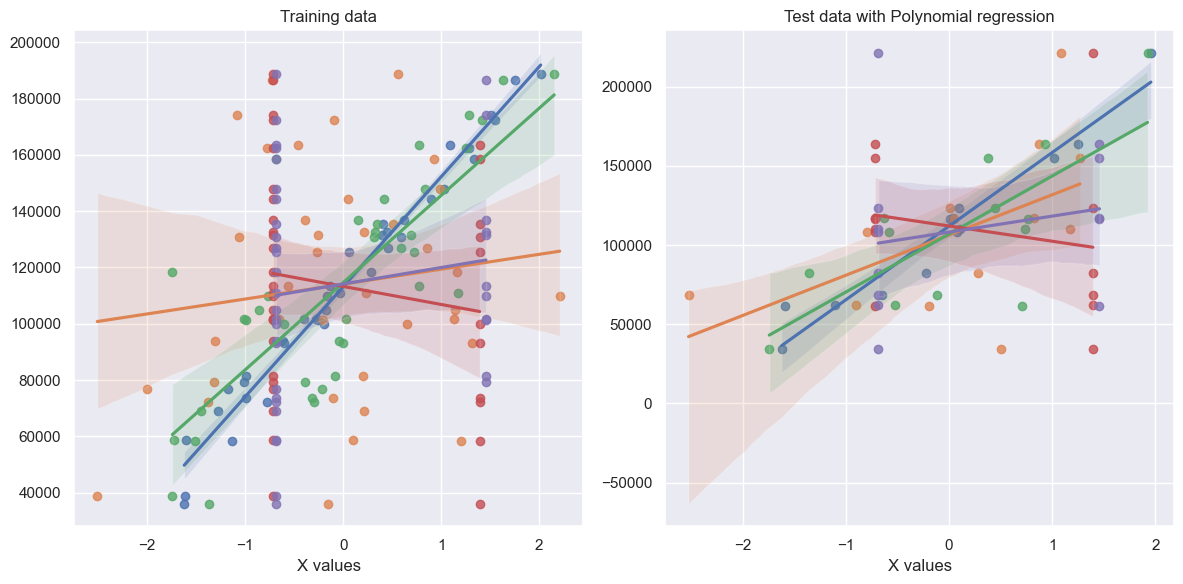

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot regression for training data
for i in range(len(x_train.columns)):
    sns.regplot(x=x_train.iloc[:,i ], y=y_pred_poly_train, ax=ax1, )
    ax1.set_title('Training data')
    ax1.set_xlabel('X values')


# Plot regression for test data
for i in range(len(x_test.columns)):
    sns.regplot(x=x_test.iloc[:, i], y=y_pred_poly_test, ax=ax2)
    ax2.set_title('Test data with Polynomial regression')
    ax2.set_xlabel('X values')

# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

## **CASE- I : Test size = 0.2 **

Split the data (80% Train and 20% Test)

In [58]:
#Split the data into training and test for building the model and for prediction
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=121)

print('x_train shape :',x_train.shape,'\n''x_test shape :', x_test.shape,'\n' 'y_train shape :',y_train.shape,'\n''y_test shape :', y_test.shape)

y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)


# Validate the actual price of the test data and predicted price
Test_accuracy = r2_score(y_test, y_pred_test)
Train_accuracy = r2_score(y_train, y_pred_train)

print ('Train accuracy :', Train_accuracy,'\n' 'Test accracy   :', Test_accuracy)


# MSE, RMSE, MAPE
MSE = mean_squared_error(y_test,y_pred_test)
print(f'1. mean squared error (MSE) = ',MSE)
RMSE = np.sqrt(MSE)
print(f'2. root mean squared error (RMSE) = {RMSE}')
MAPE = mean_absolute_percentage_error(y_test,y_pred_test)
print(f'3. mean absolute percentage error (MAPE) = {MAPE}')
ACC = 100-MAPE*100
print(f'4. accuracy of the model = {ACC}')

x_train shape : (40, 5) 
x_test shape : (10, 5) 
y_train shape : (40, 1) 
y_test shape : (10, 1)
Train accuracy : 0.9328286436777007 
Test accracy   : 0.9830641471002174
1. mean squared error (MSE) =  29104086.61012637
2. root mean squared error (RMSE) = 5394.820350125328
3. mean absolute percentage error (MAPE) = 0.04542249274560596
4. accuracy of the model = 95.45775072543941


In [59]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()   # with unscaled data
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              524.2
Date:                Mon, 17 Jul 2023   Prob (F-statistic):                    7.50e-32
Time:                        22:16:15   Log-Likelihood:                         -437.43
No. Observations:                  40   AIC:                                      884.9
Df Residuals:                      35   BIC:                                      893.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7605      0.078      9.792      0.000       0.603       0.918
Administration       0.3080      0.041      7.539      0.000       0.225       0.391
Marketing Spend      0.0633      0.028      2.287      0.028       0.007       0.119
State_California  4037.2964   5818.962      0.694      0.492   -7775.823    1.59e+04
State_Florida     3888.8627   5545.837      0.701      0.488   -7369.785    1.51e+04
==============================================================================
Omnibus:                        0.002   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.108
Skew:                          -0.007   Prob(JB):                        0.948
Kurtosis:                       2.746   Cond. No.                     8.33e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Check linearity

plt.scatter(y_test, y_pred_test)

In [ ]:
# Normality of Residual

sns.distplot((y_test - y_pred_test), bins=50)
plt.show()

#### 1) Linearity - Satisfied
#### 2) Normality of Residuals- Satisfied
#### 3) Homoscedasticity - Satisfied (there is no outlier and residual is normaly distributed, no variance in residual)
#### 4) No autocorrelation - Satisfied
#### 5) No or little Multicollinearity - satisfied
#### 6) No endogenity problem - satisfied 

P-values and coefficients in regression analysis work together to tell which relationships in the model
are statistically significant and the nature of those relationships.
- The coefficients describe the mathematical relationship between each independent variable and the
dependent variable.
- The p-values for the coefficients indicate whether these relationships are statistically significant.

In [60]:
reg_model = smf.OLS(endog = y_test, exog=x_test).fit()   # with unscaled data
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              210.7
Date:                Mon, 17 Jul 2023   Prob (F-statistic):                    8.29e-06
Time:                        22:16:15   Log-Likelihood:                         -104.46
No. Observations:                  10   AIC:                                      218.9
Df Residuals:                       5   BIC:                                      220.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.6219      0.137      4.543      0.006       0.270       0.974
Administration       0.2576      0.112      2.293      0.070      -0.031       0.547
Marketing Spend      0.1323      0.041      3.203      0.024       0.026       0.238
State_California   1.27e+04   9393.275      1.352      0.234   -1.14e+04    3.68e+04
State_Florida     7324.7987   1.41e+04      0.519      0.626    -2.9e+04    4.36e+04
==============================================================================
Omnibus:                        1.822   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                0.717
Skew:                           0.652   Prob(JB):                        0.699
Kurtosis:                       2.855   Cond. No.                     1.14e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Reguralization

# LASSO

In [61]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print("Lasso Model :", (lasso.coef_))
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)
print("Training Accuracy :", r2_score(y_train, y_pred_train_lasso))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_lasso))

Lasso Model : [ 8.14155288e-01 -3.00339115e-02  2.51026746e-02  1.49832609e+02
  3.03746274e+02]
Training Accuracy : 0.9394005680177581

Test Accuracy : 0.9916556048386072


# Ridge

In [62]:
# Part 2 : Ridge Regression (L2- Regularization)
# closure to zero but not exact zero
# penalty - 0.3

ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge Model :", (ridge.coef_))
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)
print("Training Accuracy :", r2_score(y_train, y_pred_train_ridge))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_ridge))

Ridge Model : [[ 8.14135029e-01 -3.00295914e-02  2.51212276e-02  1.37464222e+02
   2.88599737e+02]]
Training Accuracy : 0.9394005370541024

Test Accuracy : 0.9916566167602463


<Axes: xlabel='Profit'>

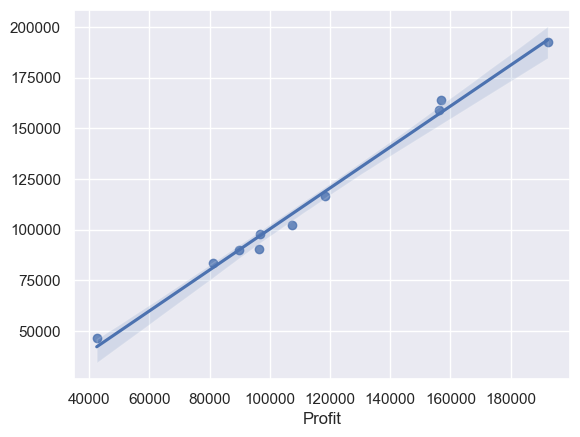

In [63]:
sns.regplot(x=y_test, y=y_pred_test_ridge)

## Elastic Net

In [64]:
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(x_train, y_train)
y_pred_train_elastic = elastic.predict(x_train)
y_pred_test_elastic = elastic.predict(x_test)
print("Training Accuracy :", r2_score(y_train, y_pred_train_elastic))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_elastic))

Training Accuracy : 0.9393963701399531

Test Accuracy : 0.9916606769091509


<Axes: xlabel='Profit'>

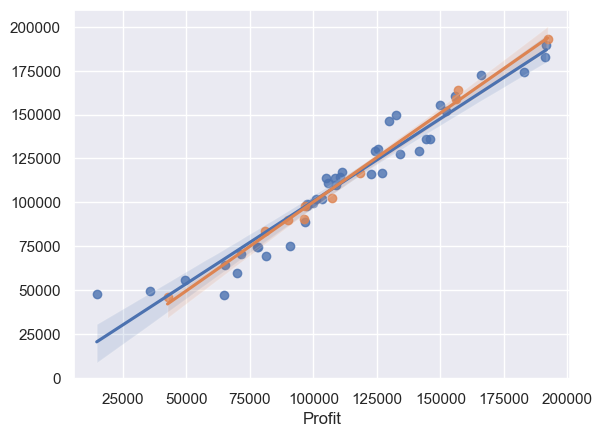

In [65]:
sns.regplot(x=y_train, y=y_pred_train_elastic)
sns.regplot(x=y_test, y=y_pred_test_elastic)

# Gradient Descent 
- Always scaled data is used.

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.25, random_state=101)
print('x_train shape :',x_train.shape,'\n''x_test shape :', x_test.shape,'\n' 'y_train shape :',y_train.shape,'\n''y_test shape :', y_test.shape)
print()
gd = SGDRegressor()
gd.fit(x_train, y_train)
y_pred_gd_train = gd.predict(x_train)
y_pred_gd_test = gd.predict(x_test)
Train_accuracy_gd =r2_score(y_train, y_pred_gd_train)
Test_accuracy_gd = r2_score(y_test, y_pred_gd_test)

print("GD Trainging Accuracy :", Train_accuracy_gd  )
print("GD Test Accuracy      :",Test_accuracy_gd  )

x_train shape : (37, 5) 
x_test shape : (13, 5) 
y_train shape : (37, 1) 
y_test shape : (13, 1)

GD Trainging Accuracy : 0.9473415978433063
GD Test Accuracy      : 0.9418237075644532


The Gradient Descent is a best fit 

<Axes: xlabel='Profit'>

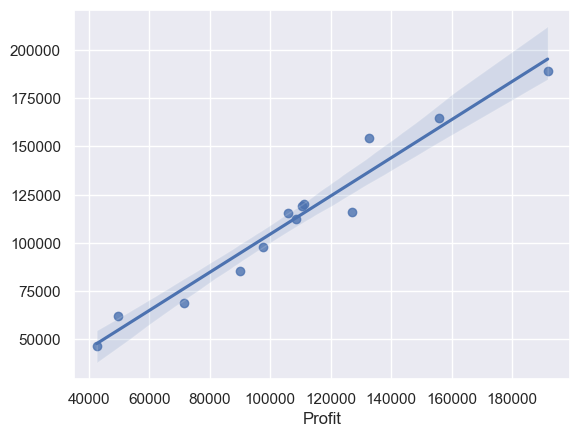

In [67]:
sns.regplot(x=y_test, y=y_pred_gd_test)


# Ploynomial Regression

In [68]:
poly = PolynomialFeatures()
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
poly.fit(x_train, y_train)
y_pred_poly_train = lr.predict(x_train_trans)
y_pred_poly_test = lr.predict(x_test_trans)
Train_accuracy_poly =r2_score(y_train, y_pred_poly_train)
Test_accuracy_poly = r2_score(y_test, y_pred_poly_test)

print("Polynomial Regression Trainging Accuracy :", Train_accuracy_poly  )
print("Polynomial Regression Test Accuracy      :",Test_accuracy_poly )

Polynomial Regression Trainging Accuracy : 0.9643335626660127
Polynomial Regression Test Accuracy      : 0.8670425426922718


<Axes: xlabel='Profit'>

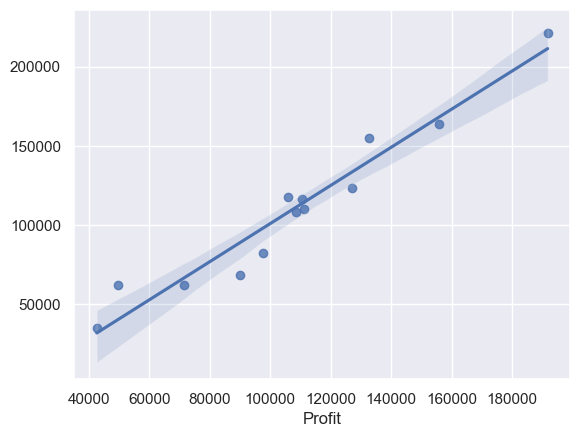

In [69]:
sns.regplot(x=y_test, y=y_pred_poly_test)

# Summary of the Model Building 

- Test accuracy_MLR (test sample 20%) > Test accuracy_MLR (test sample 30%)
- Train accuracy_MLR (test sample 20%) < Train accuracy_MLR (test sample 30%)
- Reguralization method enhanced the accuracy of both Train and Test

In [93]:
row_label=['MLR', 'OLS','Lasso', 'Ridge','ElasticNet', 'Gradient Descent','PolynomialRegression','MLR','OLS' , 'Lasso','Ridge','ElasticNet','GradientDescent', 'Polynomial regression']
accuracy_data ={'Test_size' : [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.2], 
                'R2_Train_Accuracy' : [0.965,0.993,0.965,0.96,0.963,0.947,0.964,0.932,0.987,0.939,0.939,0.939,0.947,0.964],
               'R2_Test_Accuracy' :   [0.899,0.983,0.899,0.90,0.917,0.940,0.867,0.983,0.995,0.991,0.991,0.991,0.941,0.867], }
accuracy_df =pd.DataFrame(accuracy_data, index =row_label)
accuracy_df

,Test_size,R2_Train_Accuracy,R2_Test_Accuracy
MLR,0.3,0.965,0.899
OLS,0.3,0.993,0.983
Lasso,0.3,0.965,0.899
Ridge,0.3,0.960,0.900
ElasticNet,0.3,0.963,0.917
Gradient Descent,0.3,0.947,0.940
PolynomialRegression,0.3,0.964,0.867
MLR,0.2,0.932,0.983
OLS,0.2,0.987,0.995
Lasso,0.2,0.939,0.991


In [98]:
accuracy_df['variance']= abs(accuracy_df['R2_Train_Accuracy'] - accuracy_df['R2_Test_Accuracy'])*100
accuracy_df

,Test_size,R2_Train_Accuracy,R2_Test_Accuracy,variance
MLR,0.3,0.965,0.899,6.6
OLS,0.3,0.993,0.983,1.0
Lasso,0.3,0.965,0.899,6.6
Ridge,0.3,0.960,0.900,6.0
ElasticNet,0.3,0.963,0.917,4.6
Gradient Descent,0.3,0.947,0.940,0.7
PolynomialRegression,0.3,0.964,0.867,9.7
MLR,0.2,0.932,0.983,5.1
OLS,0.2,0.987,0.995,0.8
Lasso,0.2,0.939,0.991,5.2


# Observation of the Model Building based on test sample size (0.2, 0.3)

### 1. Polynomial Regression is not a suitable model as the variance is quite high, it overfits the data. Which infers there is no non linearity between target and predictors.
### 2. The variance is minimum in case of Gradient descent.
### 3.  The accuracy is getting better by reducing sample size.
### 4.  In case of smaller sample size, the reguralization is not essential. MLR model is a best fit model for test sample size= 0.2

#                                      🙏        Thank You         🙏